In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import numpy

ini_data = pd.ExcelFile('Model_data.xlsx')
df = ini_data.parse('Model_v2 (2)')
df.head()

,Eq_TL,Eq_TA,ROE,EBIT_IntEx,S_TA,CFO_OperPr,Comp_age,Corp_group,Courts,Competition,M_founder,Man_change,Unempl_rat,Inf_FedReg,Is_Europe,Is_Asia,Is_service,Is_JointStock,Is_SME,target
0,10.000000,8.465741,4.085654,5.692909,4.467312,6.584224,22.5,1,0,1.0,1,0,1.8,13.70,1,0,0,1,0,0
1,0.000000,8.273048,4.370627,0.000000,4.272631,5.473580,23.5,1,0,1.0,1,0,1.8,5.90,1,0,0,1,0,0
2,0.000000,6.812008,2.874080,0.000000,3.777847,3.647116,24.5,1,0,1.0,1,0,1.4,3.18,1,0,0,1,0,0
3,10.000000,6.803930,4.852327,10.000000,3.817546,5.326694,25.5,1,1,1.0,1,0,1.2,4.70,1,0,0,1,0,0
4,4.975702,4.385216,3.262918,3.565572,3.180172,0.000000,26.5,1,0,1.0,1,0,1.6,3.00,1,0,0,1,0,0


In [2]:
x = df.drop('target', axis=1)
y = df['target']

In [3]:
#Реализация модели
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.290413
         Iterations 8
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.535      
Dependent Variable: target           AIC:              552.0311   
Date:               2021-03-26 00:59 BIC:              642.9573   
No. Observations:   885              Log-Likelihood:   -257.02    
Df Model:           18               LL-Null:          -552.34    
Df Residuals:       866              LLR p-value:      8.1409e-114
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     8.0000                                        
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
Eq_TL             -0.0121   0.0481  -0.2516 0.8013 -0.1064  0.0822
Eq_TA             -0.6810   0.0636 -10.7124 0.0000 -0

In [6]:
#оставляем только значимые переменные
cols = ['Eq_TA', 'ROE', 'EBIT_IntEx', 'S_TA', 'Comp_age', 'Corp_group', 'Courts', 'M_founder', 'Unempl_rat',\
        'Inf_FedReg', 'Is_SME']
x = df[cols]
y = df['target']

In [7]:
#прогоняем модель еще раз и убеждаемся, что все переменные значимы
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.293926
         Iterations 8
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.529      
Dependent Variable: target           AIC:              542.2488   
Date:               2021-03-26 01:00 BIC:              594.8903   
No. Observations:   885              Log-Likelihood:   -260.12    
Df Model:           10               LL-Null:          -552.34    
Df Residuals:       874              LLR p-value:      3.8074e-119
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     8.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
Eq_TA         -0.6807    0.0598  -11.3757  0.0000  -0.7980  -0.5634
ROE           -0.0859    0.0446   -1.9254  0.0542

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

#standardizing the data - НОРМАЛИЗАЦИЯ СИЛЬНО СНИЖАЕТ AR
#scaler = StandardScaler()
#x_train = scaler.fit_transform(x_train)
#x_test = scaler.transform(x_test)

logreg = LogisticRegression()
#logreg = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
#                           random_state=0)
logreg.fit(x_train, y_train)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.86


In [10]:
#Матрица ошибок
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[169  10]
 [ 27  60]]


In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       179
           1       0.86      0.69      0.76        87

    accuracy                           0.86       266
   macro avg       0.86      0.82      0.83       266
weighted avg       0.86      0.86      0.86       266



In [12]:
#cross validation scores
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, x_train, y_train, cv=5)
scores

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

array([0.824     , 0.87096774, 0.83064516, 0.83739837, 0.91869919])

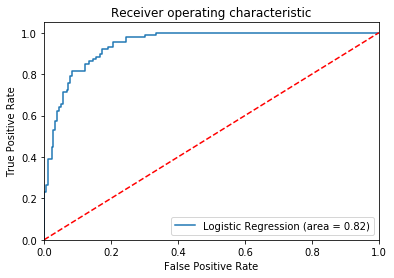

In [13]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()